In [34]:
print('--------------------------------------------------')

--------------------------------------------------


# Создание нейронных сетей различных конфигураций

## Подготовленные данные
Импорт исходных данных (по умолчанию - файл ***COVID_PSK.csv***)

In [35]:
import numpy as np
import pandas as pd

from load_csv_silent import QuickLoad


X,l,ts,df1,df = QuickLoad()

e:\Users\Alex\source\repos\TSRevenko\load_csv_silent.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


Секция со служебными функциями для вывода графиков

In [36]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

def set_style(dpi=120,fontsize=12,linewidth=1.5,fontsize_xtick=10,fontsize_ytick=10):
    plt.rcParams['figure.dpi'] = dpi
    # set font size
    plt.rcParams['font.size'] = fontsize
    # set font size on x and y axis
    plt.rcParams['axes.labelsize'] = fontsize-2
    # set font size on thickmark
    plt.rcParams['xtick.labelsize'] = fontsize_xtick
    plt.rcParams['ytick.labelsize'] = fontsize_ytick
    # set grid color
    plt.rcParams['grid.color'] = 'lightgray'
    # set grid line width
    plt.rcParams['grid.linewidth'] = linewidth*0.75
    # set grid alpha
    plt.rcParams['grid.alpha'] = 0.5
    # set border color
    plt.rcParams['axes.edgecolor'] = 'gray'
    # set border width
    plt.rcParams['axes.linewidth'] = linewidth*0.75

def lineplot(x,y,title=None,xlabel=None,ylabel=None,figsize=(10,6),dpi=120,fontsize=12,linewidth=1.5,fontsize_xtick=10,fontsize_ytick=10):
    # set figure size  size
    plt.figure(figsize=figsize)
    set_style(dpi=dpi,fontsize=fontsize,linewidth=linewidth,fontsize_xtick=fontsize_xtick,fontsize_ytick=fontsize_ytick)
    
    plt.plot(x,linewidth=linewidth)
    plt.title(title,fontsize=fontsize+2)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.gridcolor='lightblue'
    plt.grid(True)

    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=max(x),linewidth=linewidth*0.3,color='r',linestyle='-.')
    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=min(x),linewidth=linewidth*0.3,color='yellow',linestyle='-.')
    plt.show()
def lineplot2(x1,x2,y,title=None,xlabel=None,ylabel=None,figsize=(10,6),dpi=120,fontsize=12,linewidth=1.5,fontsize_xtick=10,fontsize_ytick=10):
    # set figure size  size
    plt.figure(figsize=figsize)
    set_style(dpi=dpi,fontsize=fontsize,linewidth=linewidth,fontsize_xtick=fontsize_xtick,fontsize_ytick=fontsize_ytick)
    
    plt.plot(x1,linewidth=linewidth)
    plt.plot(x2,linewidth=linewidth)
    plt.title(title,fontsize=fontsize+2)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.gridcolor='lightblue'
    plt.grid(True)

    plt.legend(['x1','x2'],fontsize=fontsize-2,loc='best')

    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=max(max(x1),max(x2)),linewidth=linewidth*0.3,color='r',linestyle='-.')
    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=min(min(x1),min(x2)),linewidth=linewidth*0.3,color='yellow',linestyle='-.')
    plt.show()

    
def lineplot_X_X2(x, x2, y,title=None,xlabel=None,ylabel=None,figsize=(10,6),dpi=120,fontsize=12,linewidth=1.5,fontsize_xtick=10,fontsize_ytick=10):
    # set figure size  size
    plt.figure(figsize=figsize)
    set_style(dpi=dpi,fontsize=fontsize,linewidth=linewidth,fontsize_xtick=fontsize_xtick,fontsize_ytick=fontsize_ytick)
    
    plt.plot(np.append(x,x2),linewidth=linewidth)
    plt.plot(x,linewidth=linewidth)

    plt.title(title,fontsize=fontsize+2)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.gridcolor='lightblue'
    plt.grid(True)

    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=max(x),linewidth=linewidth*0.3,color='r',linestyle='-.')
    # add max value of the line and plot horisontal dotted line at the max value
    plt.axhline(y=max(x2),linewidth=linewidth*0.3,color='orange',linestyle='-.')
    plt.show()    



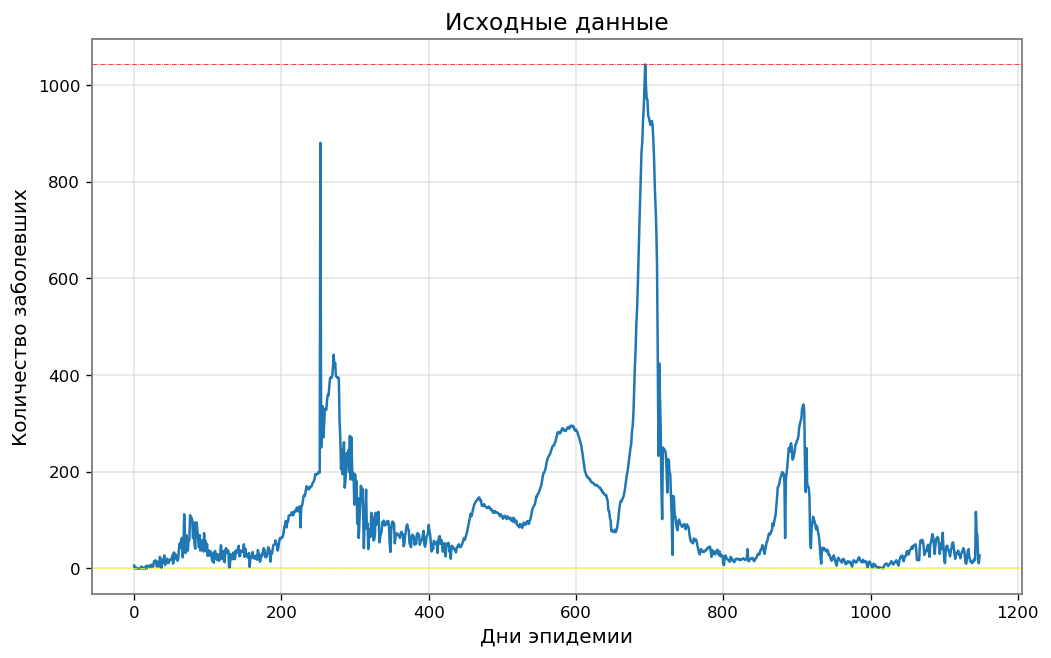

In [37]:
lineplot(X,l,figsize=(10,6),xlabel="Дни эпидемии",ylabel="Количество заболевших", title = "Исходные данные") 


## Препроцессинг данных, разделение на подмножества для обучения и проверки искусственной нейронной сети

Нормализация данных для обучения

[[[-0.7141232 ]
  [-0.75404669]
  [-0.73408494]
  ...
  [-0.60100664]
  [-0.68085362]
  [-0.57439098]]]
[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


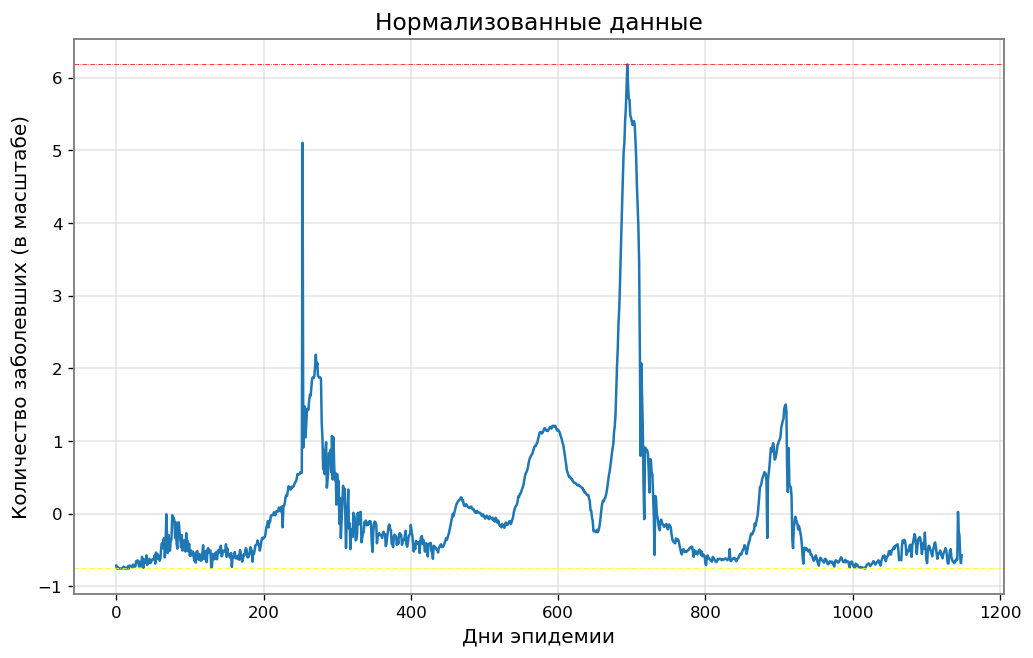

In [38]:
# Normalize the data
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)


scaler = TimeSeriesScalerMeanVariance()
# scaler = PowerTransformer(method='yeo-johnson')
# scaler = StandardScaler()
# scaler = QuantileTransformer()
# xx = np.array(X).reshape(-1, 1)

X_normalized = scaler.fit_transform([X]) 

print(X_normalized)

X_n = X_normalized[0]

print(X_n)
lineplot(X_n,l,figsize=(10,6),xlabel="Дни эпидемии",ylabel="Количество заболевших (в масштабе)", title = "Нормализованные данные")

Разделяем данные

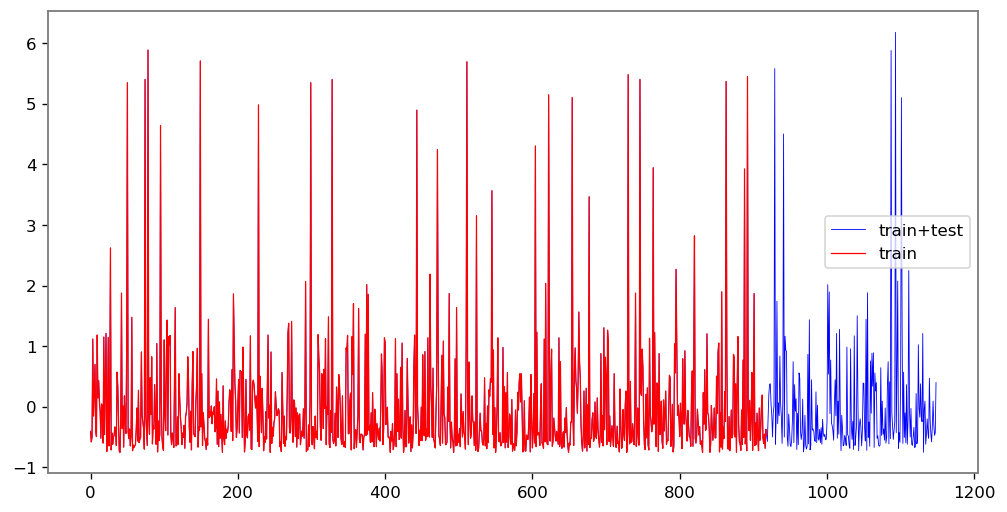

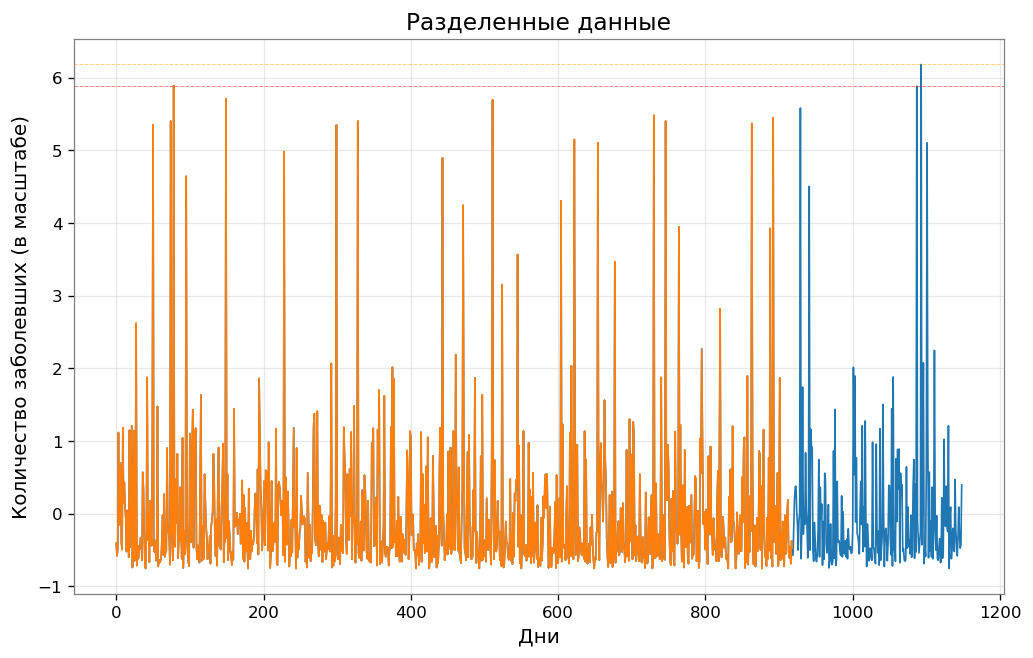

In [39]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_n, X_n, test_size=0.2, random_state=42)
# set figure size
plt.figure(figsize=(10, 5))

plt.plot(np.append(X_train, X_test), 'b', label='train+test',linewidth=0.5)
plt.plot(X_train, 'r', label='train',linewidth=0.75)
plt.legend(loc='best', fontsize=10)
plt.show()

lineplot_X_X2(X_train, X_test, y_train,figsize=(10,6),xlabel="Дни",ylabel="Количество заболевших (в масштабе)", title = "Разделенные данные",linewidth = 1)

## Создание и обучение нейронных сетей различной архитектуры и конфигурации

Какждая сеть строится на основании представленных выше данных.
С помощью библиотеки tslearn, kerass (и лежащей в их основе tensorflow) собирается сеть из определенного количества слоев.
Полученная модель уомпилируется.
Модель обучается на представленных данных. 
В диагностических целях рассчитывается ошибка масштабированных данных и ошибка в натуральном масштабе.
Так как нормализатор данных tslearn не реализует метода обратного масштабирования (inverse transform), указанная операция производится в коде.
Модель сохраняется в папку Models под именем, отражающим архитектуру модели и ее особенности для последующего использования. 

Используются разновидности рекуррентных моделей:
- GRU
- LSTM

Используется количество слоев - 1 или 2

Используется оптимизатор - adam

Используется метрика (показатель качества обучения) - MSE

Для устранения переобучения используются:

- Регуляризация L1_L2 (ElasticNET)
- Слой Dropout

Таким образом, рассматриваются модели

| LSTM / GRU | 1 слой / 2 слоя | Units1 | Units2 | без регуляризации / с регуляризацией | без Dropout / c Dropout |

Соответственно, имя модели формируется по шаблону

- Arch_{архитектура}
- Layers_{количество слоев}
- U1_{количество юнитов слоя 1}
- U2_{количество юнитов слоя 2}
- Regul1_{наличие регуляризации}
- Dropout1_{Наличие слоя Droput}
- Regul2_{наличие регуляризации}
- Dropout2_{Наличие слоя Droput}


In [40]:
from keras.models import Sequential
from keras.layers import GRU, LSTM,Dropout,Dense, GaussianNoise
from keras.regularizers import l1_l2
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping


Классы для упрощения генерации модели

Класс, описывающий свойства и архитектуру слоя. В дальнейшем на его основе формируется настроенный слой сети. Предполагается две архитектуры - GRU (быстрая) и LSTM - более медленная, но (теоретически) лучше адаптируемая. Обе архитектуры характеризуются количеством Units, обычно от 20 до 100 (в условиях задачи).

При необходимости можно включить регуляризацию (используется комплексная регуляризация ElasticNET, т.е. L1+L2).

Аналогично, можно добавить Dropout (случайное исключене определенного процента нейронов из обучения для исключения переобучения)

Параметры слоя, помимо прочего, формируют имя сети.

In [41]:
class ArchEnum:
    GRU = 'GRU'
    LSTM = 'LSTM'
    pass

# class layer

class Layer:
    def __init__(self):
        self.Architecture = ArchEnum.GRU
        self.U = 50
        self.Regul = False
        self.L1  = 0.01
        self.L2  = 0.01
        self.Drop = False
        self.Drop_rate = 0.2
    
    def __str__(self):
        return f"Architecture: {self.Architecture}, U: {self.U}, Regul: {self.Regul}, L1: {self.L1}, L2: {self.L2}, Drop: {self.Drop}, Drop_rate: {self.Drop_rate}"
    def ToString(self):
        return f"Arch_{self.Architecture}_U_{self.U}_Reg_{self.Regul}_L1_{self.L1}_L2_{self.L2}_Drop_{self.Drop}_rate_{self.Drop_rate}"
    def Constructor(self,architecture=ArchEnum.GRU,U=50,Regul=False,L1=0.01,L2=0.01,Drop=False,drop_level=0.2):
        self.Architecture = architecture
        self.U = U
        self.Regul = Regul
        self.L1 = L1
        self.L2 = L2
        self.Drop = Drop
        self.Drop_rate = drop_level
        pass

    def SimpleGRU(self,U=50):
        self.Constructor(ArchEnum.GRU,U)
        pass
    def SimpleLSTM(self,U=50):
        self.Constructor(ArchEnum.LSTM,U)
        pass
    def GRU_With_Regul(self,U=50,L1=0.01,L2=0.01):
        self.Constructor(ArchEnum.GRU,U,Regul=True,L1=L1,L2=L2)
        pass
    def LSTM_With_Regul(self,U=50,L1=0.01,L2=0.01):
        self.Constructor(ArchEnum.LSTM,U,Regul=True,L1=L1,L2=L2)
        pass
    def GRU_With_Drop(self,U=50,Drop_rate=0.2):
        self.Constructor(ArchEnum.GRU,U,Drop=True,drop_level=Drop_rate)
        pass
    def LSTM_With_Drop(self,U=50,Drop_rate=0.2):
        self.Constructor(ArchEnum.LSTM,U,Drop=True,drop_level=Drop_rate)
        pass
    def GRU_With_Regul_And_Drop(self,U=50,L1=0.01,L2=0.01,drop_level=0.2):
        self.Constructor(ArchEnum.GRU,U,Regul=True,L1=L1,L2=L2,Drop=True,drop_level=Drop_rate)
        pass
    def LSTM_With_Regul_And_Drop(self,U=50,L1=0.01,L2=0.01,Drop_rate=0.2):
        self.Constructor(ArchEnum.LSTM,U,Regul=True,L1=L1,L2=L2,Drop=True,drop_level=Drop_rate)
        pass


Класс нейронной сети. 

Необходимо использовать в правильном (показанном в комментариях) порядке, а именно.

1. Создать сеть
2. Предоставить ей данные (имеется вариант с заполнением данных по каждому элементу и метод PrepareData, который выполняет всю работу самостоятельно). В люом случае, подразумевается, что данные импортированы из файла csv (см. выше)
3. Наполнить модель слоями (Layer) с настроенными параметрами или одним слоем. Если выбрана регуляризация, то в модель будет добавлен слой с дополнительной настройкой, если Dropout, то дополнительный слой. Таким образом, каждый класс Layer порождает 1 или 2 слоя в сети.
4. Метод Build создает модель и компилирует ее.
5. После этого модель может быть обучена методом Fit. 
6. Модель обучается (максимально) заданное в модели количество эпох и использует заданный batch. Используеися оптимизатор adam и метрика (критерий качества модели) MSE
7. При достижении погрешности 0,001 (Stop criteria) и если модель не улучшается на протяжении 15 (Pation) итераций, процесс может завершится раньше
8. Метод FitAndPlot выводит график кривой обучения

Резюмируя:

NeuralNetwork1 = NeuralNetwork()

Layer1 = Layer()

Layer1.GRU_With_Drop()

Layer2 = Layer()

Layer2.SimpleGRU()

NeuralNetwork1.Layers.append(Layer1)

NeuralNetwork1.Layers.append(Layer2)

NeuralNetwork1.PrepareData(X_unscaled=X)

NeuralNetwork1.Build()

NeuralNetwork1.FitAndPlot()





In [42]:

from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta
from keras.optimizers import Nadam
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Adamax

class PlotLearningCurve(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.val_losses = []
        self.fig, self.ax = plt.subplots()

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        self.ax.clear()
        self.ax.plot(self.losses, label='train_loss')
        self.ax.plot(self.val_losses, label='val_loss')
        self.ax.legend()
        self.ax.set_xlabel('Epoch')
        self.ax.set_ylabel('Loss')
        self.fig.canvas.draw()

class NeuralNetwork:
    # STEP1 : INITIALIZE
    def __init__(self):
        self.Name = "NN"
        self.Layers = []
        self.Model = None
        
        self.X = None
        self.X_normalized = None
        self.X_n = None
        self.X_train  = None
        self.X_test = None

        self.y_train = None
        self.y_test = None

        self.EarlyStop = True

        self.Epochs = 200
        self.Batch_size = 32

        self.Stop_criteria = 0.001
        self.Patience = 15  

        pass

    def __str__(self):
        return f"Name: {self.Name}, Layers: {self.Layers}  NLayers: {len(self.Layers)}"
        pass
    def ToString(self):
        res = self.Name+'_'    
        for layer in self.Layers:
            res += layer.ToString()
            res += "_"
        return res
    # STEP2 : ADD PREPARED DATA
    def AddData(self,X_unscaled=None,X_normalized=None,X_n=None,X_n_train=None,X_n_test=None, y_train = None, y_test = None):
        self.X = X_unscaled
        self.X_normalized = X_normalized
        self.X_n = X_n
        self.X_train = X_n_train
        self.X_test = X_n_test
        self.y_train = y_train
        self.y_test = y_test
        pass
    # STEP2 : ADD DATA, based on single column X from QuickLoad
    def PrepareData(self,X_unscaled):
        self.X = X_unscaled
        scaler = TimeSeriesScalerMeanVariance()
        self.X_normalized = scaler.fit_transform([X])
        self.X_n = self.X_normalized[0]
        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train,self. y_test = train_test_split(self.X_n, self.X_n, test_size=0.2, random_state=42)
        pass
    # STEP3 : ADD LAYERS
    def AddLayer(self,layer):
        self.Layers.append(layer)
        pass
    # STEP4 : BUILD MODEL WITH PREPARED DATA AND ADDED LAYERS
    def Build(self):
        self.Model = Sequential()
        if len(self.Layers) == 0:
            print("No layers")
            return
        if self.X.any() == None:
            print("No unscaled data")
            return
        if self.X_n.any() == None:
            print("No scaled data")
            return
        if self.X_train.any() == None:
            print("No train data")
            return
        if self.X_test.any() == None:
            print("No data")
            return

        self.Model.add(GaussianNoise(0.1,input_shape=(self.X_normalized.shape[1], X_normalized.shape[2])))

            
        for i in range(0,len(self.Layers)):
            layer = self.Layers[i]
            if layer.Architecture == ArchEnum.GRU and layer.Regul == False:
                self.Model.add(
                        GRU(units=layer.U, 
                        activation='relu', 
                        return_sequences=True, 
                        input_shape=(self.X_normalized.shape[1], X_normalized.shape[2])))
            if layer.Architecture == ArchEnum.GRU and layer.Regul == True:
                self.Model.add(
                        GRU(units=layer.U, 
                        activation='relu', 
                        return_sequences=True, 
                        input_shape=(self.X_normalized.shape[1], X_normalized.shape[2]),
                        kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
            if layer.Architecture == ArchEnum.LSTM and layer.Regul == False:
                self.Model.add(
                        LSTM(units=layer.U, 
                        activation='relu', 
                        return_sequences=True, 
                        input_shape=(self.X_normalized.shape[1], X_normalized.shape[2])))
            if layer.Architecture == ArchEnum.GRU and layer.Regul == True:
                self.Model.add(
                        LSTM(units=layer.U, 
                        activation='relu', 
                        return_sequences=True, 
                        input_shape=(self.X_normalized.shape[1], X_normalized.shape[2]),
                        kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
            if layer.Drop == True:
                self.Model.add(Dropout(layer.Drop_rate))
            
        self.Model.add(Dense(1))  # Output layer for regression
        self.Model.compile(optimizer='adam', loss='mse')

    def SetOpt(self, name):
        if name == "adam":
            Opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        if name == "sgd":
            Opt = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
        if name == "rmsprop":
            Opt = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
        if name == "adagrad":
            Opt = Adagrad(lr=0.01, epsilon=None, decay=0.0)
        if name == "adadelta":
            Opt = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
        if name == "adamax":
            Opt = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
        if name == "nadam":
            Opt = Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

        self.Model.compile(optimizer=Opt, loss='mse')
        pass

    def Fit(self):
        # Define the EarlyStopping callback
        early_stopping = EarlyStopping(monitor='loss', patience=self.Patience, mode='min', min_delta=self.Stop_criteria)
        # Train the model
        if self.EarlyStop == True:
            self.Model.fit(
                self.X_train, self.y_train, epochs=self.Epochs, batch_size=self.Batch_size, validation_data=(self.X_test, self.y_test),
                callbacks=[early_stopping]
                )
        else:
            self.Model.fit(
                self.X_train, self.y_train, epochs=self.Epochs, batch_size=self.Batch_size, validation_data=(self.X_test, self.y_test)
                )
        pass

    def FitAndPlot(self):
        # Define the EarlyStopping callback
        early_stopping = EarlyStopping(monitor='loss', patience=self.Patience, mode='min', min_delta=self.Stop_criteria)
        # Define the custom callback
        plot_callback = PlotLearningCurve()
        # Train the model
        if self.EarlyStop == True:
            self.Model.fit(
            self.X_train, self.y_train, epochs=self.Epochs, batch_size=self.Batch_size, validation_data=(self.X_test, self.y_test),
            callbacks=[plot_callback, early_stopping])
        else:
            self.Model.fit(
            self.X_train, self.y_train, epochs=self.Epochs, batch_size=self.Batch_size, validation_data=(self.X_test, self.y_test),
            callbacks=[plot_callback])

    def BuidAndFit(self):
        self.Build()
        self.Fit()
    
    def BuidAndFitAndPlot(self):
        self.Build()
        self.FitAndPlot()

    def Predict(self, plot_data = True, plot_residuals = True):
        self.y_pred =  (self.Model.predict(self.X_normalized))[0]
        self.residuals =(X_normalized[0] - y_pred)

        if plot_data == True:
            lineplot2(self.X_n,self.y_pred,_,title="Сравнение",xlabel="Время",ylabel="Данные (трансформированные)")
        if plot_residuals == True:
            lineplot(self.residuals,_, title="Остатки",xlabel="Время",ylabel="Остатки (трансформированные)")
        pass

    def Postprocess(self, plot_data = True, plot_residuals = True):
        mu = np.mean(self.X)
        var = np.var(self.X)
        sd = np.sqrt(var)
        print(mu,var,sd)
        X_hat = self.y_pred * sd + mu
        print(X_hat)
        Residuals = (X_hat - self.X)[0]
        if plot_data == True:
            lineplot2(self.X,X_hat,_,title="Сравнение",xlabel="Время",ylabel="Данные (натуральные значения)")
        if plot_residuals == True:
            lineplot(Residuals,_, title="Остатки",xlabel="Время",ylabel="Остатки (натуральные значения)")
        pass


        pass

    def SaveModel(self,path = None):
        if path == None:
            path = "./Mdl/"+self.ToString()+".h5"
        else:
            path = "./Mdl/" + self.ToString() + ".h5"

        self.Model.save(path)
        pass


Типичные настройки

In [43]:
NeuralNetwork1 = NeuralNetwork()
# Typical values

NeuralNetwork1.Epochs = 256
NeuralNetwork1.BatchSize = 64

NeuralNetwork1.EarlyStop = True
NeuralNetwork1.Stop_criteria = 0.000001
NeuralNetwork1.Patience = 25

Layer1 = Layer()
Layer1.GRU_With_Drop(Drop_rate = 0.0125)
Layer1.U = 100

Layer2 = Layer()
Layer2.SimpleGRU()
Layer2.U = 60

NeuralNetwork1.Layers.append(Layer1)
#NeuralNetwork1.Layers.append(Layer2)


SetOpt - задает оптимизатор (теоретически более быстрый)

In [44]:
# NeuralNetwork1.AddData(X_unscaled=X,X_normalized=X_normalized,X_n=X_n,X_n_train=X_train,X_n_test=X_test,y_train=y_train,y_test=y_test)
NeuralNetwork1.PrepareData(X_unscaled=X)
NeuralNetwork1.Build()
NeuralNetwork1.SetOpt(name="sgd")


e:\Alex\anaconda3\envs\med_2023\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Обучение модели и вывод результатов

Epoch 1/256
29/29 [==============================] - 2s 16ms/step - loss: 0.9101 - val_loss: 0.8367
Epoch 2/256
29/29 [==============================] - 0s 5ms/step - loss: 0.6994 - val_loss: 0.6397
Epoch 3/256
29/29 [==============================] - 0s 5ms/step - loss: 0.5264 - val_loss: 0.4525
Epoch 4/256
29/29 [==============================] - 0s 5ms/step - loss: 0.3507 - val_loss: 0.2725
Epoch 5/256
29/29 [==============================] - 0s 6ms/step - loss: 0.2055 - val_loss: 0.1372
Epoch 6/256
29/29 [==============================] - 0s 5ms/step - loss: 0.0979 - val_loss: 0.0616
Epoch 7/256
29/29 [==============================] - 0s 5ms/step - loss: 0.0494 - val_loss: 0.0275
Epoch 8/256
29/29 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.0144
Epoch 9/256
29/29 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.0095
Epoch 10/256
29/29 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0079
Epoch 11

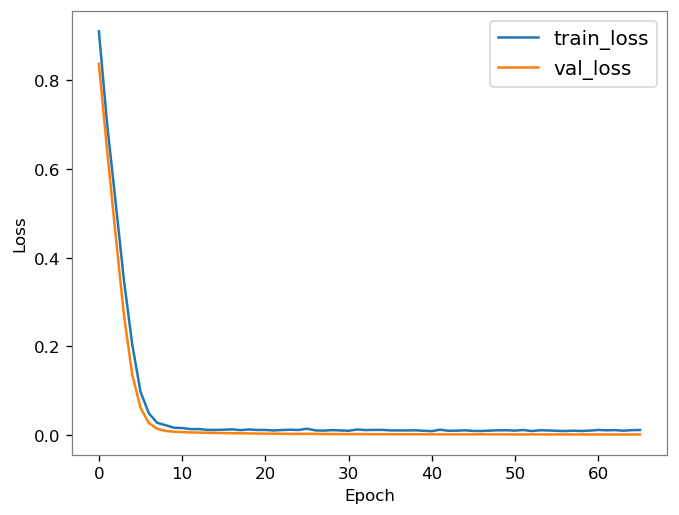

In [45]:

# NeuralNetwork1.Fit()
NeuralNetwork1.FitAndPlot()

In [46]:
NeuralNetwork1.Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_2 (GaussianN  (None, 1149, 1)          0         
 oise)                                                           
                                                                 
 gru_2 (GRU)                 (None, 1149, 100)         30900     
                                                                 
 dropout_2 (Dropout)         (None, 1149, 100)         0         
                                                                 
 dense_2 (Dense)             (None, 1149, 1)           101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 259ms/step


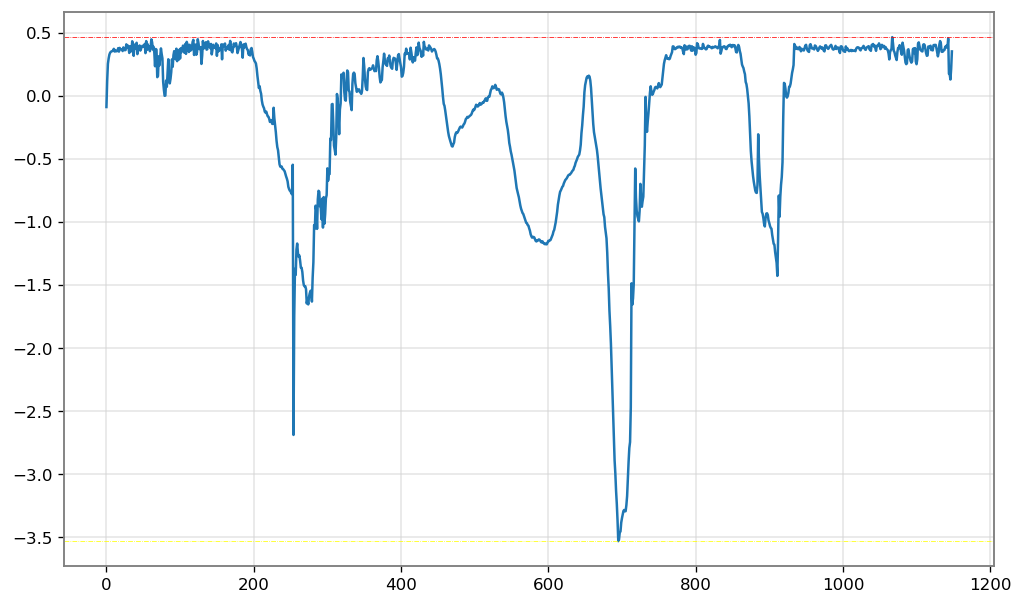

In [47]:
y_pred =  (NeuralNetwork1.Model.predict(X_normalized))[0]
residuals =(X_normalized[0] - y_pred)

# Print the accuracy
# lineplot(X_normalized[0],y_pred)
lineplot(residuals,X_normalized[0])


1/1 [==============================] - 0s 80ms/step


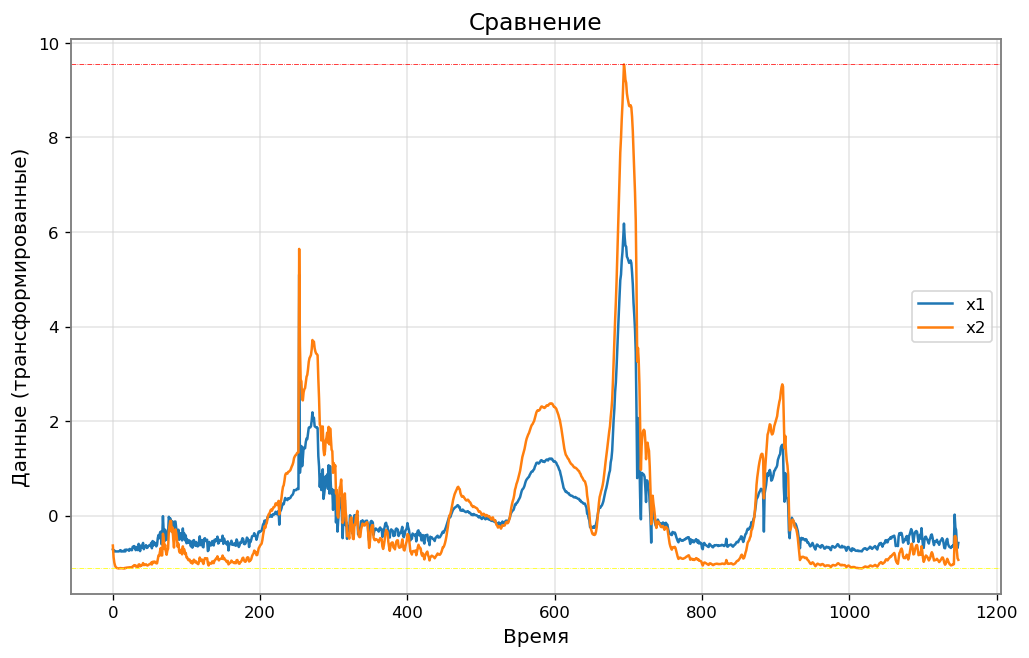

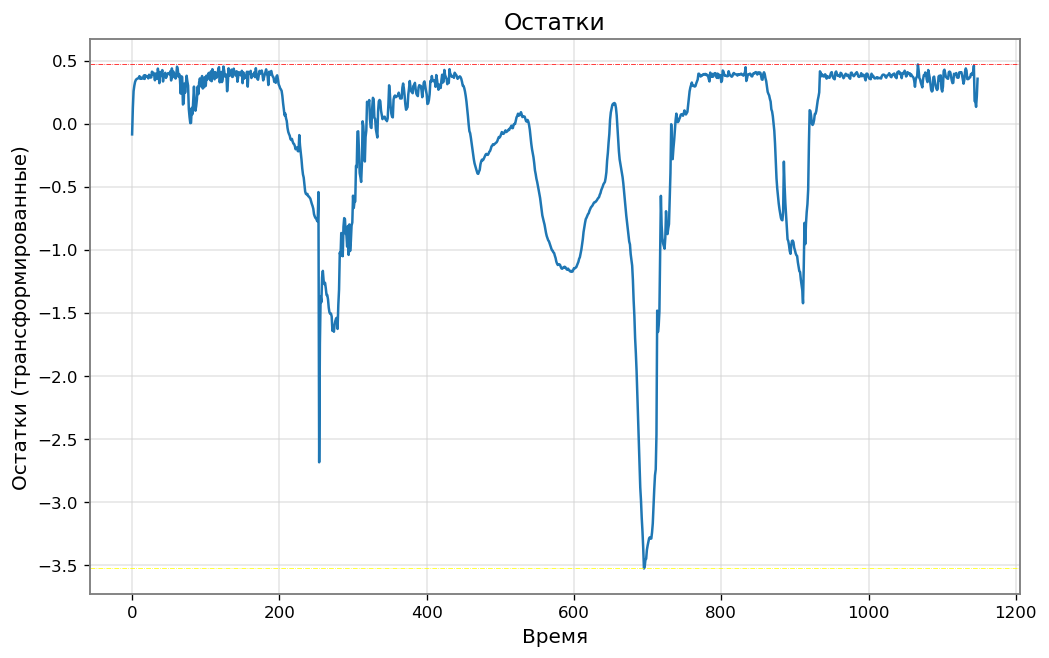

In [48]:
NeuralNetwork1.Predict(plot_data = True, plot_residuals = True)

113.32375979112271 22586.319896742993 150.2874575496671
[[ 18.660858 ]
 [-18.65123  ]
 [-35.94026  ]
 ...
 [  2.8567657]
 [-21.911026 ]
 [-26.66217  ]]


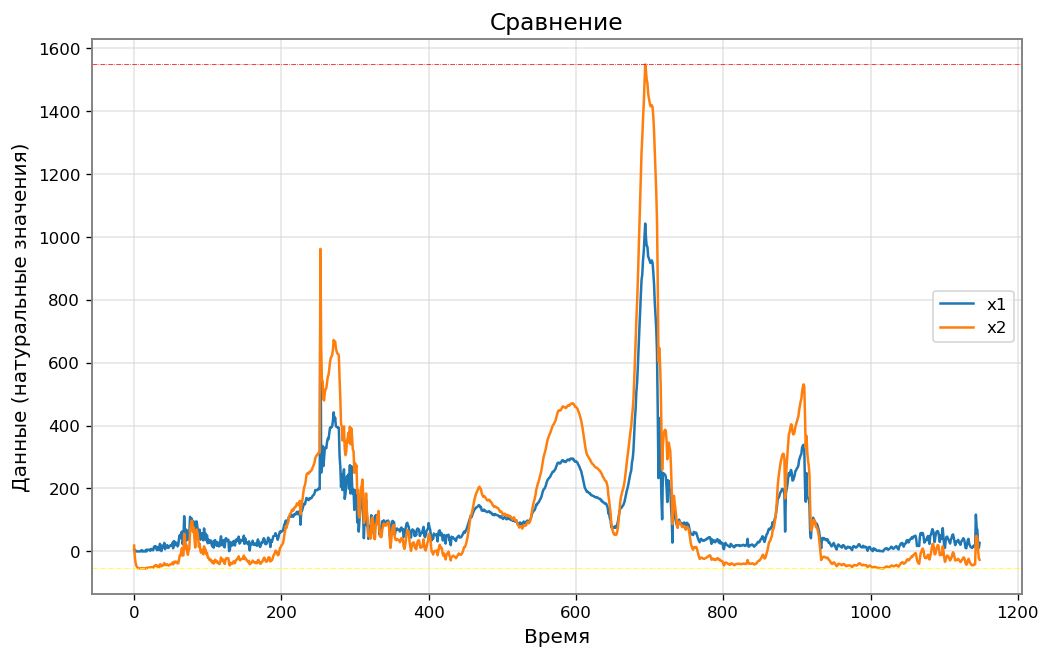

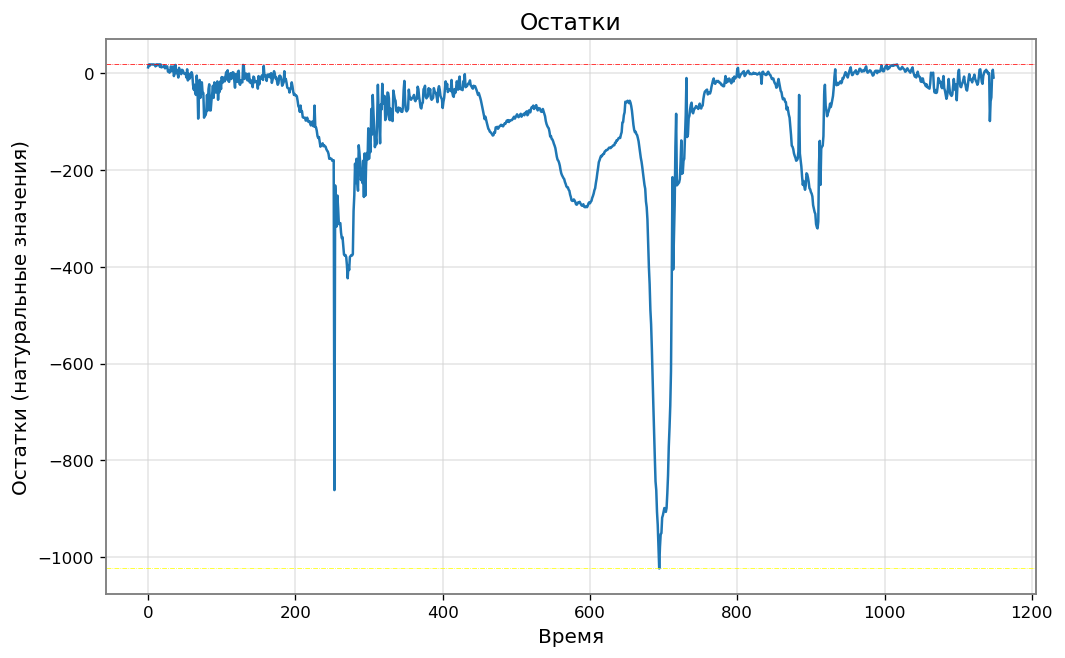

In [49]:
NeuralNetwork1.Postprocess(plot_data = True, plot_residuals = True)

In [50]:
NeuralNetwork1.SaveModel()